#Graph

##Library/Environment

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


##Scraping/Crawling

In [ ]:
# Unduh konten halaman web berita
url = "https://www.antaranews.com/berita/3799980/musim-kemarau-permintaan-air-bersih-di-ponorogo-capai-600-ribu-liter?utm_source=antaranews&utm_medium=desktop&utm_campaign=menu_news"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div' ,class_="post-content clearfix")  # Sesuaikan dengan struktur HTML halaman web berita
article_text = article.get_text()

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(article_text)

# Cetak kalimat-kalimat
for sentence in sentences:
    print(sentence)



permintaan cukup signifikan dalam kurun dua bulan terakhirPonorogo, Jatim (ANTARA) - Permintaan air bersih masyarakat di Badan Usaha Milik Desa (BUMDes)  Bekiring, Ponorogo, Jawa Timur, pada musim kemarau satu hingga dua bulan ini, mencapai 600 ribu liter per hari atau jauh meningkat dibanding sebelumnya tak sampai 200 ribu liter per hari.
"Ada peningkatan volume permintaan cukup signifikan dalam kurun dua bulan terakhir," kata Pembina BUMDes Bekiring, Agus Santoso di Ponorogo, Senin.
Desa Bekiring merupakan salah satu desa di kaki Gunung Wilis yang menyediakan air bersih melimpah.
Penjualan air bersih yang bersumber di kaki/lereng Gunung Wilis ini dikelola oleh BUMDes Bekiring.
Banyak truk tangki dari berbagai tempat, baik yang beroperasi di lingkup Ponorogo maupun luar daerah seperti Trenggalek, Madiun, Magetan hingga Kediri dan Blitar yang datang untuk membeli air bersih di sentra usaha layanan milik desa ini.
Baca juga: Pemprov Bali distribusikan air bersih ke 117 dusun terdampak 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##Vektorisasi TF-IDF

In [ ]:
# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 
permintaan cukup signifikan dalam kurun dua bulan terakhirPonorogo, Jatim (ANTARA) - Permintaan air bersih masyarakat di Badan Usaha Milik Desa (BUMDes)  Bekiring, Ponorogo, Jawa Timur, pada musim kemarau satu hingga dua bulan ini, mencapai 600 ribu liter per hari atau jauh meningkat dibanding sebelumnya tak sampai 200 ribu liter per hari.
200: 0.1482
600: 0.1302
air: 0.0562
antara: 0.1302
atau: 0.1482
badan: 0.1482
bekiring: 0.1076
bersih: 0.0770
bulan: 0.2605
bumdes: 0.0996
cukup: 0.1175
dalam: 0.1076
desa: 0.0996
di: 0.0770
dibanding: 0.1482
dua: 0.2605
hari: 0.2605
hingga: 0.0996
ini: 0.0928
jatim: 0.1482
jauh: 0.1482
jawa: 0.1482
kemarau: 0.1076
kurun: 0.1302
liter: 0.2153
masyarakat: 0.1482
mencapai: 0.1482
meningkat: 0.1482
milik: 0.1076
musim: 0.1175
pada: 0.0928
per: 0.2963
permintaan: 0.1856
ponorogo: 0.1175
ribu: 0.2350
sampai: 0.1302
satu: 0.1175
sebelumnya: 0.1482
signifikan: 0.1302
tak: 0.1482
terakhirponorogo: 0.1482
timur: 0.1482
usaha: 0.1302

Kalimat 2: "A

##Perbandingan kesamaan antar kalimat menggunakan Cosine Similarity

In [ ]:
# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.3243


##Menghitung Kesamaan/Similarity antar kalimat

In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.3243
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.1312
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.1027
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.1184
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.1518
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0843
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0794
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.1080
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.0386
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.0807
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.0214
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.0383
Cosine Similarity antara Kalimat 1 dan Kalimat 14: 0.0246
Cosine Similarity antara Kalimat 1 dan Kalimat 15: 0.0070
Cosine Similarity antara Kalimat 1 dan Kalimat 16: 0.0859
Cosine Similarity antara Kalimat 1 dan Kalimat 17: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 18: 0.1727
Cosine Similarity anta

###Tampilan Perbandingan Cosine Similarity antar kalimat dalam Tabel

In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df

,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13,Kalimat 14,Kalimat 15,Kalimat 16,Kalimat 17,Kalimat 18,Kalimat 19,Kalimat 20
Kalimat 1,1.000000,0.324348,0.131177,0.102739,0.118403,0.151788,0.084274,0.079448,0.108009,0.038583,0.080731,0.021350,0.038347,0.024592,0.006991,0.085903,0.000000,0.172681,0.186283,0.058527
Kalimat 2,0.324348,1.000000,0.066641,0.109126,0.057882,0.077076,0.080779,0.095904,0.043336,0.017274,0.000000,0.000000,0.046877,0.082443,0.000000,0.025808,0.000000,0.020291,0.019640,0.017214
Kalimat 3,0.131177,0.066641,1.000000,0.370204,0.152056,0.083556,0.073754,0.147824,0.125195,0.021521,0.217066,0.040446,0.025079,0.053537,0.015219,0.049297,0.000000,0.153068,0.026965,0.000000
Kalimat 4,0.102739,0.109126,0.370204,1.000000,0.126004,0.087365,0.125643,0.075460,0.123440,0.055163,0.317830,0.042290,0.026222,0.119177,0.015913,0.051544,0.000000,0.065551,0.028194,0.000000
Kalimat 5,0.118403,0.057882,0.152056,0.126004,1.000000,0.134418,0.062218,0.151105,0.162103,0.044030,0.117237,0.036282,0.043917,0.056790,0.009021,0.048281,0.000000,0.113485,0.098767,0.067217
Kalimat 6,0.151788,0.077076,0.083556,0.087365,0.134418,1.000000,0.171283,0.139067,0.019253,0.000000,0.162268,0.186247,0.063756,0.072777,0.017024,0.054321,0.000000,0.259348,0.211831,0.044295
Kalimat 7,0.084274,0.080779,0.073754,0.125643,0.062218,0.171283,1.000000,0.129918,0.070305,0.091619,0.137458,0.066393,0.024763,0.046027,0.015027,0.016927,0.000000,0.086864,0.054465,0.000000
Kalimat 8,0.079448,0.095904,0.147824,0.075460,0.151105,0.139067,0.129918,1.000000,0.121919,0.017319,0.118690,0.077422,0.000000,0.120204,0.024495,0.053468,0.071908,0.125015,0.104892,0.023237
Kalimat 9,0.108009,0.043336,0.125195,0.123440,0.162103,0.019253,0.070305,0.121919,1.000000,0.177283,0.045951,0.022611,0.000000,0.012943,0.017481,0.019692,0.000000,0.089218,0.030973,0.000000
Kalimat 10,0.038583,0.017274,0.021521,0.055163,0.044030,0.000000,0.091619,0.017319,0.177283,1.000000,0.124901,0.020518,0.037529,0.032368,0.050902,0.095043,0.057419,0.019359,0.000000,0.086834


###Menampilkan Tingkat similarity antar kalimat

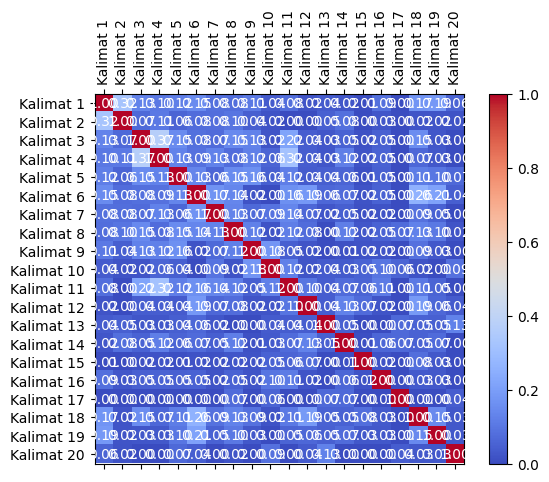

In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()

##Menampilkan dan menghitung Closeness centrality pada setiap kalimat

In [ ]:
# Buat grafik dari matriks similarity
G = nx.Graph()
kal = []
# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)
    kalimat=sentence
    kal.append(kalimat)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")

Closeness Centrality of 
permintaan cukup signifikan dalam kurun dua bulan terakhirPonorogo, Jatim (ANTARA) - Permintaan air bersih masyarakat di Badan Usaha Milik Desa (BUMDes)  Bekiring, Ponorogo, Jawa Timur, pada musim kemarau satu hingga dua bulan ini, mencapai 600 ribu liter per hari atau jauh meningkat dibanding sebelumnya tak sampai 200 ribu liter per hari.: 28.8742
Closeness Centrality of "Ada peningkatan volume permintaan cukup signifikan dalam kurun dua bulan terakhir," kata Pembina BUMDes Bekiring, Agus Santoso di Ponorogo, Senin.: 24.3910
Closeness Centrality of Desa Bekiring merupakan salah satu desa di kaki Gunung Wilis yang menyediakan air bersih melimpah.: 27.9116
Closeness Centrality of Penjualan air bersih yang bersumber di kaki/lereng Gunung Wilis ini dikelola oleh BUMDes Bekiring.: 24.5399
Closeness Centrality of Banyak truk tangki dari berbagai tempat, baik yang beroperasi di lingkup Ponorogo maupun luar daerah seperti Trenggalek, Madiun, Magetan hingga Kediri dan 

##Menampilkan graph dan menghitung closeness centrality pada tiap node

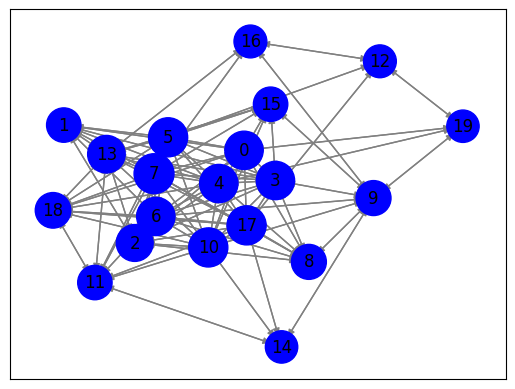

Closeness Centrality:
Node 0: 0.7600
Node 1: 0.6129
Node 2: 0.7037
Node 3: 0.7600
Node 4: 0.7600
Node 5: 0.7917
Node 6: 0.7600
Node 7: 0.8261
Node 8: 0.6333
Node 9: 0.6333
Node 10: 0.7917
Node 11: 0.6129
Node 12: 0.5588
Node 13: 0.7308
Node 14: 0.5429
Node 15: 0.6129
Node 16: 0.5588
Node 17: 0.7917
Node 18: 0.6552
Node 19: 0.5429


In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.05 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality
print("Closeness Centrality:")
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: {closeness:.4f}")


##Menghitung dan mengurutkan Page Rank pada tiap tiap node kalimat

In [ ]:
# Hitung PageRank
pagerank = nx.pagerank(G, alpha=0.85)

# Tampilkan hasil PageRank
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

for node, rank in sorted_pagerank:
    #kalimat = G.nodes[node]['kalimat']  # Mengakses kalimat yang terkait dengan simpul
    print(f"Node {node}: PageRank = {rank:.4f} Kalimatnya : {kal[node]}")

Node 7: PageRank = 0.0724 Kalimatnya : Hal itu karena dalam sehari ada lebih dari 15 mobil tanki air yang lalu lalang mengisi di stasiun air milik desa tersebut.
Node 17: PageRank = 0.0690 Kalimatnya : Baca juga: Jabar distribusikan 15 juta liter air pada warga terdampak kekeringan

Sementara salah satu sopir truk tangki air bersih mengatakan, dikarenakan permintaan membludak, tiap hari dirinya mengisi air bersih hingga sebanyak lima kali pengisian.
Node 10: PageRank = 0.0682 Kalimatnya : Stabil
Pihaknya juga mengatakan sejak awal musim kemarau yang terjadi pada pertengahan tahun ini, air bersih yang bersumber dari kaki Gunung Wilis tersebut selalu stabil.
Node 5: PageRank = 0.0681 Kalimatnya : Baca juga: Pemprov Bali distribusikan air bersih ke 117 dusun terdampak kemarau

Ia mengatakan, permintaan hingga 600 ribu liter itu ada yang ke pelanggan tetap, tetapi ada juga untuk keperluan bantuan air bersih bagi daerah yang mengalami kekeringan.
Node 0: PageRank = 0.0637 Kalimatnya : 
perm

##Menghitung Eigen Vector dan Melakukan Pengurutan

In [ ]:
#Mencari Eigen Vector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

#Mengurutkan Eigen Vector dari yang tertinggi
sorted_eigen = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

#Menampilkannya dengan kalimat yang menyertai
for node, centrality in sorted_eigen :
    print(f"Node {node}: Eigenvector Centrality = {centrality:.4f} Kalimatnya : {kal[node]}")

Node 7: Eigenvector Centrality = 0.3091 Kalimatnya : Hal itu karena dalam sehari ada lebih dari 15 mobil tanki air yang lalu lalang mengisi di stasiun air milik desa tersebut.
Node 5: Eigenvector Centrality = 0.2938 Kalimatnya : Baca juga: Pemprov Bali distribusikan air bersih ke 117 dusun terdampak kemarau

Ia mengatakan, permintaan hingga 600 ribu liter itu ada yang ke pelanggan tetap, tetapi ada juga untuk keperluan bantuan air bersih bagi daerah yang mengalami kekeringan.
Node 10: Eigenvector Centrality = 0.2891 Kalimatnya : Stabil
Pihaknya juga mengatakan sejak awal musim kemarau yang terjadi pada pertengahan tahun ini, air bersih yang bersumber dari kaki Gunung Wilis tersebut selalu stabil.
Node 17: Eigenvector Centrality = 0.2861 Kalimatnya : Baca juga: Jabar distribusikan 15 juta liter air pada warga terdampak kekeringan

Sementara salah satu sopir truk tangki air bersih mengatakan, dikarenakan permintaan membludak, tiap hari dirinya mengisi air bersih hingga sebanyak lima kali